# bangalore real estate price prediction - a simple analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
df = pd.read_csv("bangalore.csv")
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.describe(include='all')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


# extracting bhk from size

In [5]:
df['bhk'] = df['size'].str.extract(r'(\d+)').astype(float)
df[['size', 'bhk']].head()


,size,bhk
0,2 BHK,2.0
1,4 Bedroom,4.0
2,3 BHK,3.0
3,3 BHK,3.0
4,2 BHK,2.0


# covert total sqfrt

In [12]:
def convert_sqft(x):
    try:
        if '-' in str(x):
            a, b = x.split('-')
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df[['total_sqft']].head()


,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0


# drop rows with null

In [7]:
df['bhk'] = df['size'].str.extract(r'(\d+)').astype(float)
df.dropna(subset=['total_sqft', 'bath', 'price', 'bhk'], inplace=True)




# removing null values - then covert prices to inr

In [71]:
df.dropna(subset=['total_sqft', 'bath', 'price', 'bhk'], inplace=True)
df['price_inr'] = df['price'] * 1e5  # Convert lakhs to INR
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_inr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0,5100000.0


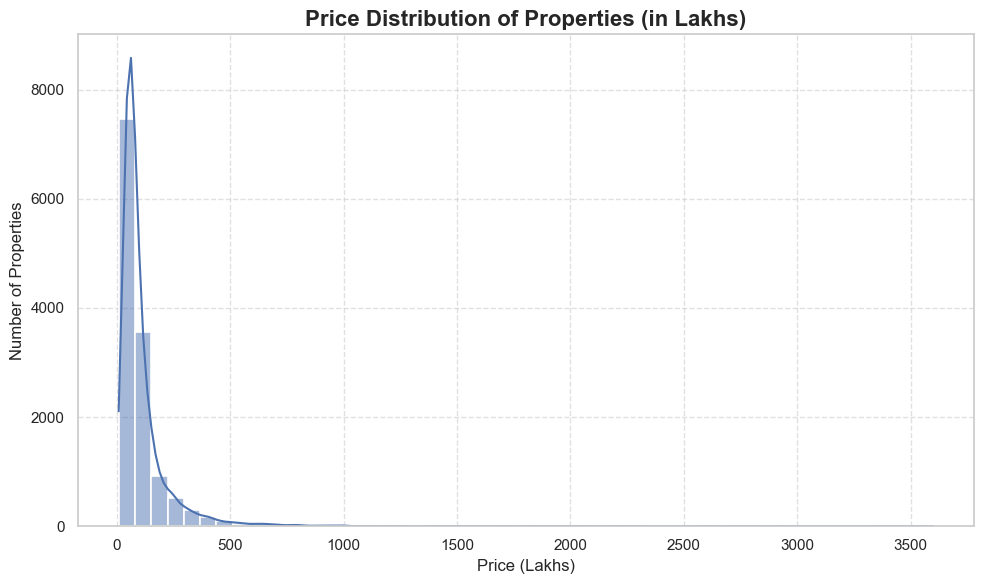

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color="#4c72b0", edgecolor="white", linewidth=1.2)

plt.title("Price Distribution of Properties (in Lakhs)", fontsize=16, fontweight='bold')
plt.xlabel("Price (Lakhs)", fontsize=12)
plt.ylabel("Number of Properties", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


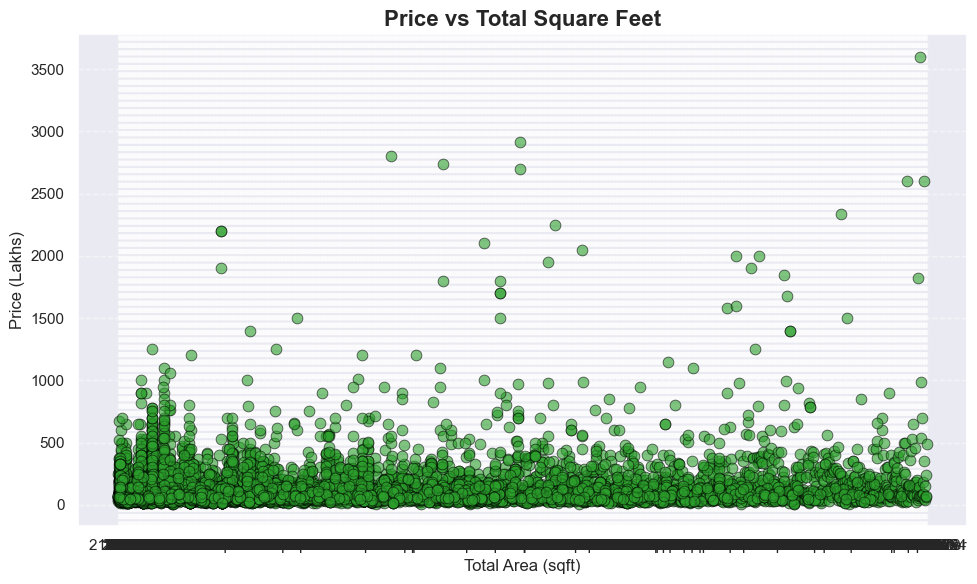

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='total_sqft', 
    y='price', 
    data=df, 
    color='#2ca02c', 
    edgecolor='black', 
    alpha=0.6,
    s=60 
)

plt.title("Price vs Total Square Feet", fontsize=16, fontweight='bold')
plt.xlabel("Total Area (sqft)", fontsize=12)
plt.ylabel("Price (Lakhs)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


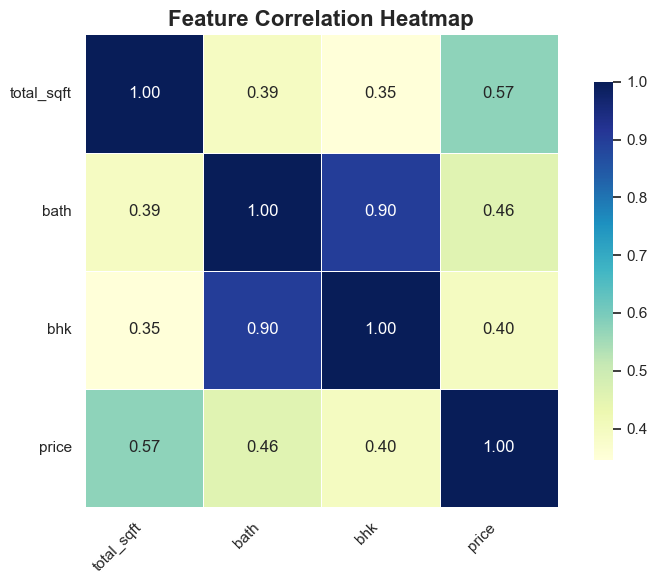

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white")


corr = df[['total_sqft', 'bath', 'bhk', 'price']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='YlGnBu',         # visually appealing color palette
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    annot_kws={"size": 12}
)

plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


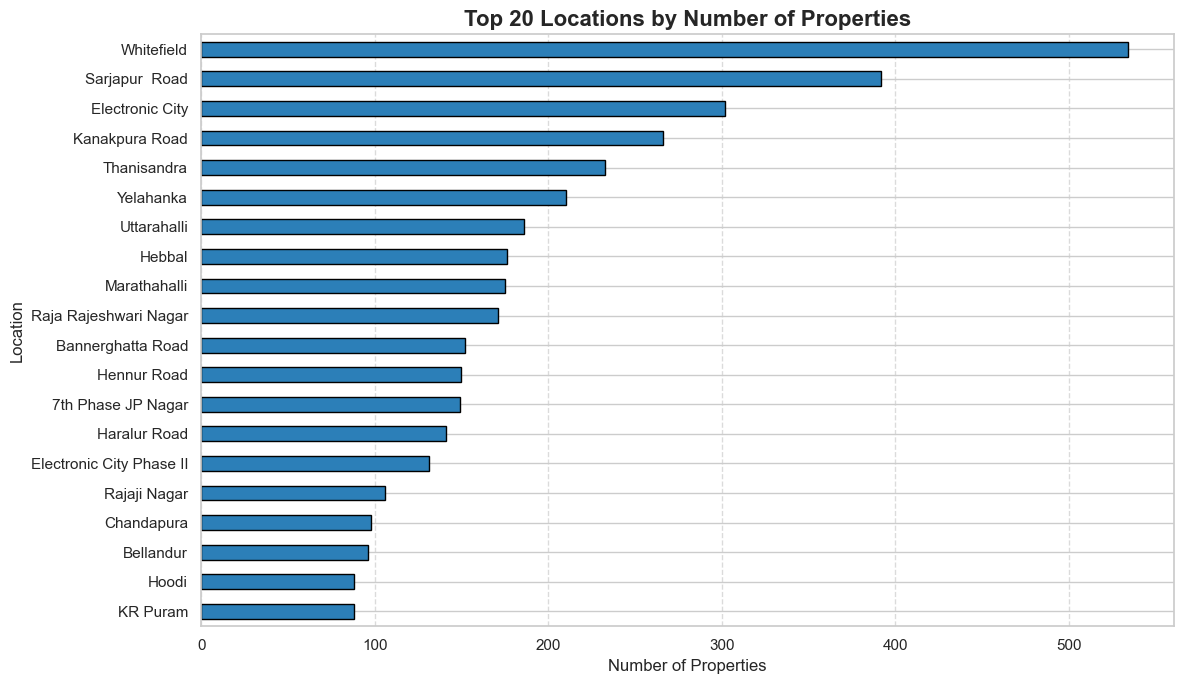

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12,7))
df['location'].value_counts().head(20).sort_values().plot(
    kind='barh',
    color="#2c7fb8",
    edgecolor='black'
)

plt.title("Top 20 Locations by Number of Properties", fontsize=16, fontweight='bold')
plt.xlabel("Number of Properties", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()


NameError: name 'y_test' is not defined

<Figure size 800x500 with 0 Axes>